# Question 1

By: Nicholas Soucy

## 1) Neural Network

Let's try to fit the data using neural network. Use the first 150 examples for training, and the remainder for estimating the mean squared error. Assume that all activation functions are rectified linear unit (ReLU).

Additional Comments:
    1) Initalize weights of all layers using normal distribution (please add rng(0) or np.random.seed(0))
    2) Initalize biases with zeros 
    3) Size of the first layer is 64 and the second layer is 16
    4) Try to vectorize the code to reduce running time
    5) Use gradient descent for training and use reasonable stopping criteria to terminate the gradient updates
    6) Use the learning rate 1e -7 for gradient descent

In [13]:
#imports
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.special import expit
from sklearn.preprocessing import StandardScaler

In [14]:
#Load the data
bodyfat = sio.loadmat('bodyfat_data.mat')
X = bodyfat['X']
Y = bodyfat['y']
n,d = X.shape


print("Orignal Data Sizes")
print(X.shape, Y.shape)

#split into train and test data 
train_size = 150
x_train = X[:train_size, :]
x_test = X[train_size:, :]
y_train = Y[:train_size]
y_test = Y[train_size:]

print("Train and Test shapes")
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

Orignal Data Sizes
(248, 2) (248, 1)
Train and Test shapes
(150, 2) (98, 2) (150, 1) (98, 1)


### a) Implement the forward pass and the backward pass.

In [15]:
#Lets create a class for ease

class NN():
    
    def __init__(self, layers=[2,64,16,1], learning_rate=1e-7, iterations = 100):
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers 
        self.X = None
        self.Y = None
    
    def init_weights(self):
        '''
        Initialize the weights from a random normal distribution with 
        random seed being 0.
        '''
        np.random.seed(1) # Seed the random number generator
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
        self.params['b1']  =np.random.randn(self.layers[1],)
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
        self.params['b2'] = np.random.randn(self.layers[2],)
        self.params['W3'] = np.random.randn(self.layers[2],self.layers[3]) 
        self.params['b3'] = np.random.randn(self.layers[3],)      
        
    def relu(self,x):
        return np.maximum(0,x)
    
    def dRelu(self, x):
        x[x<=0] = 0
        x[x>0] = 1
        return x

    def MSE_loss(self,y, y_hat):
        loss = np.mean((y_hat - y)**2)
        return loss
    
    def forward_pass(self):
        z1=np.dot(self.X,self.params['W1'])+self.params['b1']
        a1=self.relu(z1)
        z2=np.dot(a1,self.params['W2']) + self.params['b2']
        a2 = self.relu(z2)
        y_hat = np.dot(a2,self.params['W3'])+ self.params['b3']
        loss = self.MSE_loss(self.Y, y_hat)
        
        # save calculated parameters     
        self.params['Z1'] = z1
        self.params['Z2'] = z2
        self.params['A1'] = a1
        self.params['A2'] = a2

        return y_hat,loss

    def backward_pass(self,y_hat):

        #backpropogation code
        l3_error = (y_hat-self.Y)/float(self.Y.shape[0])
        l2_error = l3_error.dot(self.params['W3'].T)
        l2_delta = l2_error*self.dRelu(self.params['Z2'])
        l1_error = l2_delta.dot(self.params['W2'].T)
        l1_delta = l1_error*self.dRelu(self.params['Z1'])

        #update parameters
        self.params['W3'] -= self.learning_rate *self.params['A2'].T.dot(l3_error)
        self.params['W2'] -= self.learning_rate*self.params['A1'].T.dot(l2_delta)
        self.params['W1'] -= self.learning_rate*self.X.T.dot(l1_delta)
        self.params['b3'] -= self.learning_rate*np.sum(l3_error)
        self.params['b2'] -= self.learning_rate*np.sum(l2_delta,axis =0)
        self.params['b1'] -= self.learning_rate*np.sum(l1_delta,axis =0)

    
    def fit(self, X, Y):
        '''
        Trains the neural network using the specified data and labels
        '''
        self.X = X
        self.Y = Y
        self.init_weights() #initialize weights and bias

        for i in range(self.iterations):
            y_hat, loss = self.forward_pass()
            self.backward_pass(y_hat)
            self.loss.append(loss)

            
    def predict(self, X):
        '''
        Predicts on a test data by passing forward pass on the 
        x_test data with saved parameters
        ''' 
        z1=np.dot(self.X,self.params['W1'])+self.params['b1']
        a1=self.relu(z1)
        z2=np.dot(a1,self.params['W2']) + self.params['b2']
        a2 = self.relu(z2)
        y_hat = np.dot(a2,self.params['W3'])+ self.params['b3']
        loss = self.MSE_loss(self.Y, y_hat)
        return(loss)

    
    def plot_loss(self):
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("MSE Loss")
        plt.title("Loss curve for training")
        plt.show()  
        print(f"Mean Squared Error on Training Data: {self.loss[-1]}")

### b) Report the mean squared error on the training data

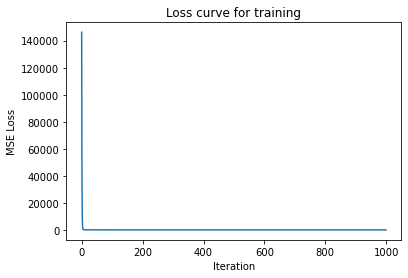

Mean Squared Error on Training Data: 25.693966864314266


In [16]:
nn = NN(iterations=1000) # create the NN model
nn.fit(x_train, y_train) #train the model
nn.plot_loss()

### b2) Explain Stopping Criteia

For the stopping criteria, because it ran pretty quickly, I just ran it at insane values first and saw what MSE I got. 

At 200000 (Yep!) I got an MSE of 20.38543522081721

At 20000 I got an MSE of 20.419648337595437

At 10000 I got an MSE of 20.64030734924752

At 5000 I got an MSE of 27.2040211323742

At 4000 I got an MSE of 42.03897030999849

At 2000 I got an MSE of 261.50634639175075


So lets plot this now:

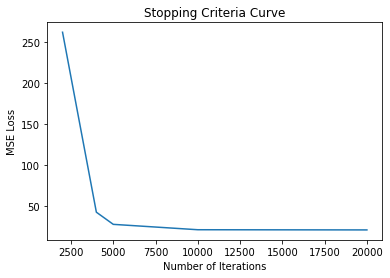

In [17]:
x = [2000,4000,5000,10000,20000]
y = [261.50634639175075,42.03897030999849,27.2040211323742,20.64030734924752,20.419648337595437]
plt.plot(x,y)
plt.xlabel("Number of Iterations")
plt.ylabel("MSE Loss")
plt.title("Stopping Criteria Curve")
plt.show()  

As you can see, that sweet spot is around 5000 iterations, just to be safe, I set the iterations to be 6000 based on our emperical data above.

### c) Report the mean squared error on the test inputs

In [18]:
test_pred = nn.predict(x_test)
print(f"Mean Squared Error on Testing Data: {test_pred}")

Mean Squared Error on Testing Data: 25.69279648212747
